
Assignment 3 Solution

Import necessary libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

Image Augmentation

In [8]:
data_path = './flowers/'
batch_size = 32
target_size = (64, 64)

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [10]:
X_train = train_datagen.flow_from_directory(data_path,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            subset="training",
                                            class_mode='categorical')



X_test = test_datagen.flow_from_directory(data_path,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Create model

In [11]:
model = Sequential()

Add layers

In [12]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0


Compile the model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the model

In [15]:
model.fit(X_train, steps_per_epoch=100, epochs=20)

Epoch 1/20
100/100 [==============================] - 127s 1s/step - loss: 1.3940 - accuracy: 0.3749
Epoch 2/20
100/100 [==============================] - 24s 243ms/step - loss: 1.1695 - accuracy: 0.5178
Epoch 3/20
100/100 [==============================] - 18s 183ms/step - loss: 1.0374 - accuracy: 0.5926
Epoch 4/20
100/100 [==============================] - 16s 160ms/step - loss: 0.9988 - accuracy: 0.6138
Epoch 5/20
100/100 [==============================] - 15s 152ms/step - loss: 0.9226 - accuracy: 0.6355
Epoch 6/20
100/100 [==============================] - 15s 150ms/step - loss: 0.9307 - accuracy: 0.6415
Epoch 7/20
100/100 [==============================] - 15s 151ms/step - loss: 0.8774 - accuracy: 0.6507
Epoch 8/20
100/100 [==============================] - 15s 154ms/step - loss: 0.8507 - accuracy: 0.6605
Epoch 9/20
100/100 [==============================] - 15s 152ms/step - loss: 0.8264 - accuracy: 0.6885
Epoch 10/20
100/100 [==============================] - 15s 151ms/step - los

Save the model

In [16]:
model.save("model.h5")

Test the model

In [27]:
def predict():
    img = image.load_img("./tulip.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("./tulip.jpg"))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 26ms/step
The given image is a tulip


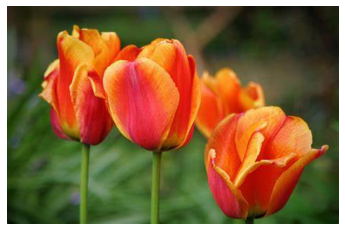

In [28]:
predict()